In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def quantize(signal, levels):
    q_signal = np.round(signal * levels) / levels
    return q_signal


def quantization_error_power(original, quantized):
    error = original - quantized
    return np.mean(error ** 2)

def compute_sqnr(original, quantized):
    signal_power = np.mean(original ** 2)
    noise_power = quantization_error_power(original, quantized)
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr
def theoretical_sqnr(bits):
    return 6.02 * bits + 1.76

In [4]:
f0 = 1/50  # frequency
N = 200    # Sample
n = np.arange(N)
x_n = np.sin(2 * np.pi * f0 * n)
quantization_bits = [6, 7, 8]
quantization_levels = [2**b for b in quantization_bits]

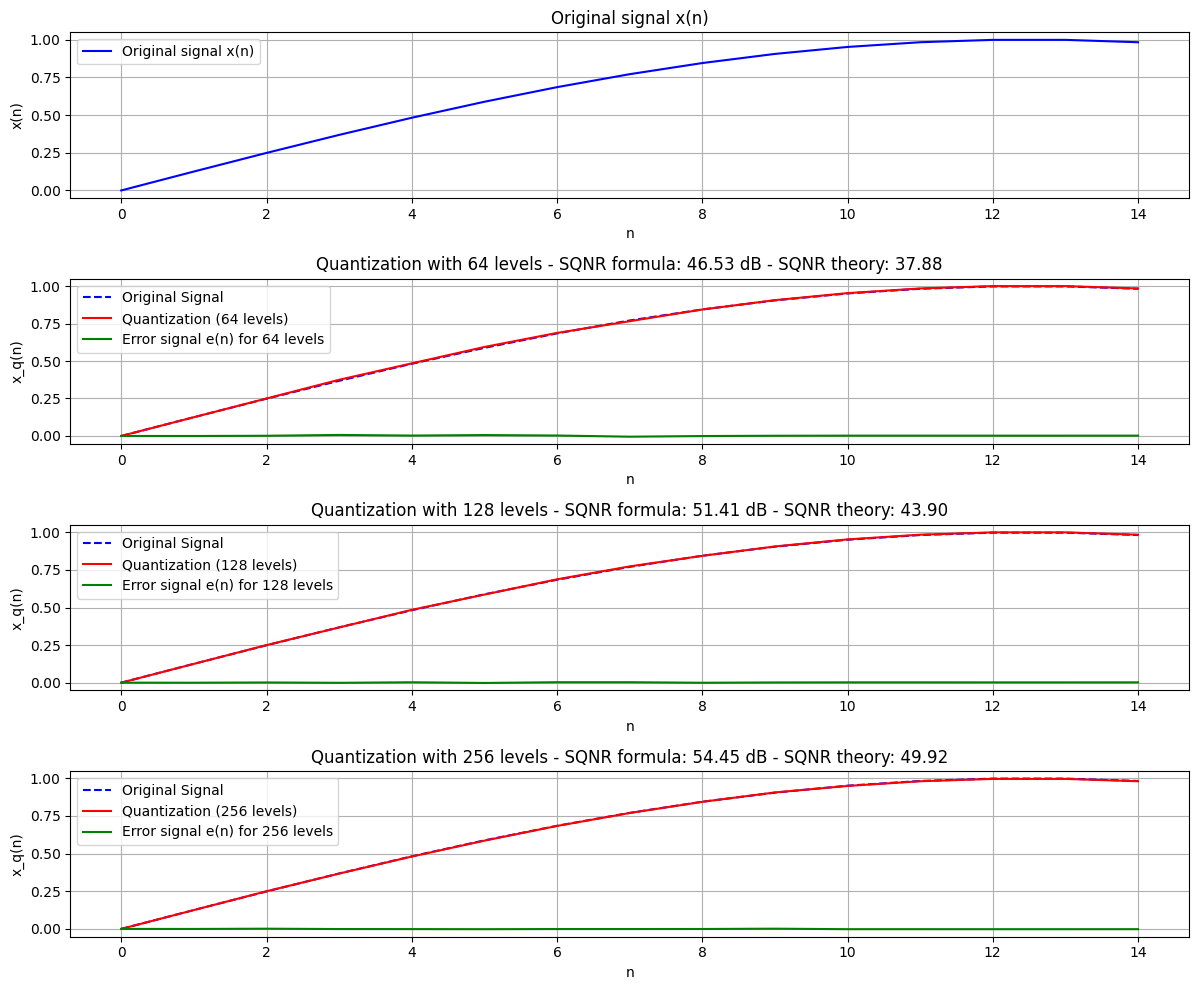

In [5]:
# Select small range to zoom in 
zoom_range = np.arange(15)

plt.figure(figsize=(12, 10))
plt.subplot(len(quantization_levels) + 1, 1, 1)
plt.plot(zoom_range, x_n[zoom_range], label='Original signal x(n)', color='blue')
plt.title('Original signal x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.legend()
plt.grid(True)


for i, levels in enumerate(quantization_levels):
    x_q = quantize(x_n, levels)
    
    # Calculate quantization error power and SQNR
    Pq = quantization_error_power(x_n, x_q)
    sqnr_formula = compute_sqnr(x_n, x_q)
    sqnr_theory = theoretical_sqnr(quantization_bits[i])
    error_signal = x_q - x_n
    
    plt.subplot(len(quantization_levels) + 1, 1, i+2)
    plt.plot(zoom_range, x_n[zoom_range], label='Original Signal', linestyle='--', color='blue')
    plt.plot(zoom_range, x_q[zoom_range], label=f'Quantization ({levels} levels)', color='red')
    plt.plot(zoom_range, error_signal[zoom_range], label=f'Error signal e(n) for {levels} levels', color='green')
    plt.title(f'Quantization with {levels} levels - SQNR formula: {sqnr_formula:.2f} dB - SQNR theory: {sqnr_theory:.2f}')
    plt.xlabel('n')
    plt.ylabel('x_q(n)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()